<a href="https://colab.research.google.com/github/LinarKulinar/Data-Analysis-Tools-SSAU/blob/main/Lab_3_Classification_6133_Akhmetov.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Лабораторная работа 3
Классификация в sklearn. Метрики классификации

Выполнил: 6133, Ахметов Линар

In [1]:
# import pandas as pd
# import numpy as np

# import matplotlib.pyplot as plt 
# import seaborn as sns 

0.  Выберите наборы данных, подходящие для многоклассовой и бинарной классификации. Опишите данные, что обозначает каждый столбец, какого типа (категориальный, вещественный, целочисленный, бинарный) данный столбец, при необходимости для категориальных в том числе бинарных признаков привести расшифровку их значений. В общем, проведите "визуальный" анализ ваших данных.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
# Загрузим с Githib датасет
url_columns = 'https://raw.githubusercontent.com/LinarKulinar/Data-Analysis-Tools-SSAU/main/data/columns.csv'
url_responses = 'https://raw.githubusercontent.com/LinarKulinar/Data-Analysis-Tools-SSAU/main/data/responses.csv'

In [4]:
df_columns = pd.read_csv(url_columns)
df_responses = pd.read_csv(url_responses)

In [5]:
df_responses

,Music,Slow songs or fast songs,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,...,Age,Height,Weight,Number of siblings,Gender,Left - right handed,Education,Only child,Village - town,House - block of flats
0,5.0,3.0,2.0,1.0,2.0,2.0,1.0,5.0,5.0,1.0,...,20.0,163.0,48.0,1.0,female,right handed,college/bachelor degree,no,village,block of flats
1,4.0,4.0,2.0,1.0,1.0,1.0,2.0,3.0,5.0,4.0,...,19.0,163.0,58.0,2.0,female,right handed,college/bachelor degree,no,city,block of flats
2,5.0,5.0,2.0,2.0,3.0,4.0,5.0,3.0,5.0,3.0,...,20.0,176.0,67.0,2.0,female,right handed,secondary school,no,city,block of flats
3,5.0,3.0,2.0,1.0,1.0,1.0,1.0,2.0,2.0,1.0,...,22.0,172.0,59.0,1.0,female,right handed,college/bachelor degree,yes,city,house/bungalow
4,5.0,3.0,4.0,3.0,2.0,4.0,3.0,5.0,3.0,1.0,...,20.0,170.0,59.0,1.0,female,right handed,secondary school,no,village,house/bungalow
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1005,5.0,2.0,5.0,2.0,2.0,5.0,4.0,4.0,4.0,3.0,...,20.0,164.0,57.0,1.0,female,right handed,secondary school,no,city,house/bungalow
1006,4.0,4.0,5.0,1.0,3.0,4.0,1.0,4.0,1.0,1.0,...,27.0,183.0,80.0,5.0,male,left handed,masters degree,no,village,house/bungalow
1007,4.0,3.0,1.0,1.0,2.0,2.0,2.0,3.0,4.0,1.0,...,18.0,173.0,75.0,0.0,female,right handed,secondary school,yes,city,block of flats
1008,5.0,3.0,3.0,3.0,1.0,3.0,1.0,3.0,4.0,1.0,...,25.0,173.0,58.0,1.0,female,right handed,college/bachelor degree,no,city,block of flats


In [6]:
# Узнаем название столбца в таблице df_responses по названию 'Drinking' из описания датасета 
df_columns[df_columns['original']=='Drinking']

,original,short
74,Drinking,Alcohol


In [7]:
data = df_responses[['Age', 'Height',	'Weight', 'Music', 'Movies', 'Smoking', 'Alcohol', 'Healthy eating', 'Number of siblings', 'Village - town', 'House - block of flats', 'Only child', 'Education']]
data = data.dropna()
data

,Age,Height,Weight,Music,Movies,Smoking,Alcohol,Healthy eating,Number of siblings,Village - town,House - block of flats,Only child,Education
0,20.0,163.0,48.0,5.0,5.0,never smoked,drink a lot,4.0,1.0,village,block of flats,no,college/bachelor degree
1,19.0,163.0,58.0,4.0,5.0,never smoked,drink a lot,3.0,2.0,city,block of flats,no,college/bachelor degree
2,20.0,176.0,67.0,5.0,5.0,tried smoking,drink a lot,3.0,2.0,city,block of flats,no,secondary school
3,22.0,172.0,59.0,5.0,5.0,former smoker,drink a lot,3.0,1.0,city,house/bungalow,yes,college/bachelor degree
4,20.0,170.0,59.0,5.0,5.0,tried smoking,social drinker,4.0,1.0,village,house/bungalow,no,secondary school
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1005,20.0,164.0,57.0,5.0,5.0,current smoker,drink a lot,3.0,1.0,city,house/bungalow,no,secondary school
1006,27.0,183.0,80.0,4.0,5.0,never smoked,social drinker,3.0,5.0,village,house/bungalow,no,masters degree
1007,18.0,173.0,75.0,4.0,4.0,tried smoking,social drinker,2.0,0.0,city,block of flats,yes,secondary school
1008,25.0,173.0,58.0,5.0,5.0,tried smoking,social drinker,3.0,1.0,city,block of flats,no,college/bachelor degree


### Кодируем категориальные признаки с помощью Label-Encoding

Кодируем столбец `Smoking`

In [8]:
from sklearn import preprocessing

le_smoking = preprocessing.LabelEncoder()
le_smoking.fit(data['Smoking'])
le_smoking.classes_

array(['current smoker', 'former smoker', 'never smoked', 'tried smoking'],
      dtype=object)

In [9]:
data['Smoking'] = le_smoking.transform(data['Smoking'])
data.head(1)

,Age,Height,Weight,Music,Movies,Smoking,Alcohol,Healthy eating,Number of siblings,Village - town,House - block of flats,Only child,Education
0,20.0,163.0,48.0,5.0,5.0,2,drink a lot,4.0,1.0,village,block of flats,no,college/bachelor degree


Кодируем столбец `Alcohol`

In [10]:
le_alcohol = preprocessing.LabelEncoder()
le_alcohol.fit(data['Alcohol'])
le_alcohol.classes_

array(['drink a lot', 'never', 'social drinker'], dtype=object)

In [11]:
data['Alcohol'] = le_alcohol.transform(data['Alcohol'])
data.head(1)

,Age,Height,Weight,Music,Movies,Smoking,Alcohol,Healthy eating,Number of siblings,Village - town,House - block of flats,Only child,Education
0,20.0,163.0,48.0,5.0,5.0,2,0,4.0,1.0,village,block of flats,no,college/bachelor degree


Кодируем столбец `Village - town`

In [12]:
le_village = preprocessing.LabelEncoder()
le_village.fit(data['Village - town'])
le_village.classes_

array(['city', 'village'], dtype=object)

In [13]:
data['Village - town'] = le_village.transform(data['Village - town'])
data.head(1)

,Age,Height,Weight,Music,Movies,Smoking,Alcohol,Healthy eating,Number of siblings,Village - town,House - block of flats,Only child,Education
0,20.0,163.0,48.0,5.0,5.0,2,0,4.0,1.0,1,block of flats,no,college/bachelor degree


Кодируем столбец `House - block of flats`

In [14]:
le_house = preprocessing.LabelEncoder()
le_house.fit(data['House - block of flats'])
le_house.classes_

array(['block of flats', 'house/bungalow'], dtype=object)

In [15]:
data['House - block of flats'] = le_house.transform(data['House - block of flats'])
data.head(1)

,Age,Height,Weight,Music,Movies,Smoking,Alcohol,Healthy eating,Number of siblings,Village - town,House - block of flats,Only child,Education
0,20.0,163.0,48.0,5.0,5.0,2,0,4.0,1.0,1,0,no,college/bachelor degree


Анализуем класс `Education`

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


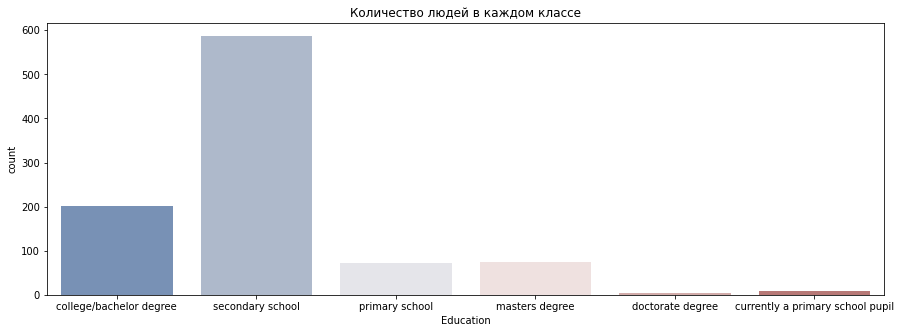

In [16]:
fig, ax = plt.subplots(figsize=(15,5))
sns.countplot(data['Education'], palette='vlag')
ax.set(title='Количество людей в каждом классе')
plt.show()

In [17]:
# Отфильтровываем слишком мелкие классы
data = data[data['Education']!='doctorate degree']
data = data[data['Education']!='currently a primary school pupil']
data.head(3)

,Age,Height,Weight,Music,Movies,Smoking,Alcohol,Healthy eating,Number of siblings,Village - town,House - block of flats,Only child,Education
0,20.0,163.0,48.0,5.0,5.0,2,0,4.0,1.0,1,0,no,college/bachelor degree
1,19.0,163.0,58.0,4.0,5.0,2,0,3.0,2.0,0,0,no,college/bachelor degree
2,20.0,176.0,67.0,5.0,5.0,3,0,3.0,2.0,0,0,no,secondary school


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


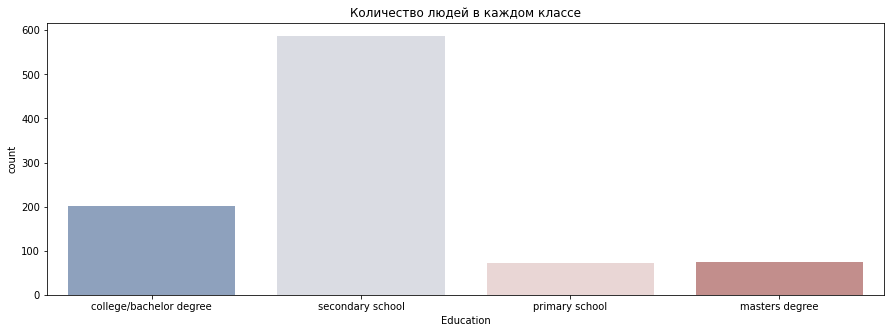

In [18]:
fig, ax = plt.subplots(figsize=(15,5))
sns.countplot(data['Education'], palette='vlag')
ax.set(title='Количество людей в каждом классе')
plt.show()

Кодируем столбец `Education`

In [19]:
le_education = preprocessing.LabelEncoder()
le_education.fit(data['Education'])
le_education.classes_

array(['college/bachelor degree', 'masters degree', 'primary school',
       'secondary school'], dtype=object)

In [20]:
data['Education'] = le_education.transform(data['Education'])
data.head(1)

,Age,Height,Weight,Music,Movies,Smoking,Alcohol,Healthy eating,Number of siblings,Village - town,House - block of flats,Only child,Education
0,20.0,163.0,48.0,5.0,5.0,2,0,4.0,1.0,1,0,no,0


## Изучим корреляцию между признаками

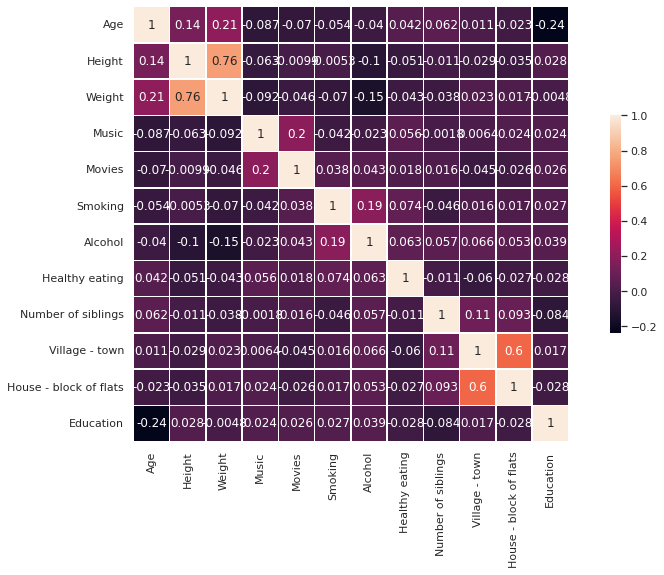

In [21]:
sns.set(rc={"figure.figsize":(15, 8)})


corr = data.corr(method='spearman')
sns.heatmap(corr, 
            square=True, 
            linewidths=.5, 
            cbar_kws={"shrink": .5},
            annot=True)

Видно существенную корреляцию между возрастом и уровнем образования

**1. Многоклассовая классификация:**

1.1 На любом датасете продемонстрировать многоклассовую классификацию с помощью ЛЮБОГО алгоритма. Оценить accuracy.

1.2. То же самое с использованием кросс-валидации

1.3. Поиграться с гиперпараметром, связанным со сложностью модели (в случае kNN — k_neighbours) и построить график accuracy для train set и test_set для разных значений гиперпараметра (в лекции есть пример построения подобного графика для kNN и датасета cancer, но можно строить как угодно такой график)

1.4. Построить confusion matrix (это вроде матрицы TN / TP/ FN/ FP, только расширенной для многоклассовой классификации, чтобы понять в какие стороны чаще ошибается классификатор). ([пример](https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html)):

In [22]:
"""confusion_scores = sklearn.metrics.confusion_matrix( y_test, y_pred )
confusion_df = pd.DataFrame( confusion_scores, columns = iris.target_names, index = iris.target_names )
sns.heatmap( confusion_df, annot = True  )"""

'confusion_scores = sklearn.metrics.confusion_matrix( y_test, y_pred )\nconfusion_df = pd.DataFrame( confusion_scores, columns = iris.target_names, index = iris.target_names )\nsns.heatmap( confusion_df, annot = True  )'

**2. Бинарная классификация.**

На любом (но уже другом, бинарном) датасете продемонстрировать бинарную классификацию (можно использовать любой алгоритм), посчитать метрики: accuracy, precision, recall, f-measure, а также составить `classification_report`



**3. Использование нормализации признаков**
В обоих задачах (бинарной и многоклассовой классификации) попробовать также вариант с предварительной нормализацией признаков (`StandardScaler`или `MinMaxScaler`). Оценить метрики качества в случае с нормализованными признаками и ненормализованными.

In [23]:

# Тупо хардкодим признаки т.к.

data['Education'] = data['Education'].apply(lambda x: ['primary school', 'secondary school', 'college/bachelor degree', 'masters degree'].index(x))

ValueError: ignored